In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Input , SimpleRNN 


In [96]:
series = np.sin(0.1*np.arange(1000)) + np.random.randn(1000)*0.3

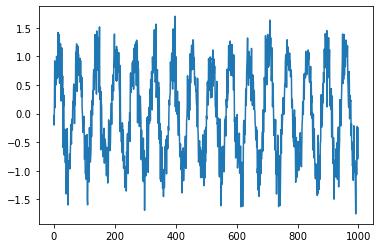

In [97]:
plt.plot(series)

In [98]:
T = 10

X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [99]:
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

In [100]:
X.shape

(990, 10, 1)

In [101]:
X[0].shape

(10, 1)

In [102]:
Y.shape

(990,)

In [103]:
N = len(X)
N

990

In [104]:
X[:N//2].shape  # we can slice multidim arrays in this fashion as well along any dimension

(495, 10, 1)

In [105]:
import tensorflow as tf 
i = Input(shape=(X[0].shape))
x = SimpleRNN(20 , activation='relu')(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001) , loss = 'mse' )

r = model.fit(X[:N//2] , Y[: N//2] , epochs = 80 , validation_data = (X[N//2:] , Y[N//2 :]) )

Epoch 1/80
16/16 [==============================] - 0s 14ms/step - loss: 0.4300 - val_loss: 0.3472
Epoch 2/80
16/16 [==============================] - 0s 5ms/step - loss: 0.2887 - val_loss: 0.2078
Epoch 3/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1858 - val_loss: 0.1468
Epoch 4/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1525 - val_loss: 0.1338
Epoch 5/80
16/16 [==============================] - 0s 6ms/step - loss: 0.1442 - val_loss: 0.1256
Epoch 6/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1386 - val_loss: 0.1221
Epoch 7/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1354 - val_loss: 0.1194
Epoch 8/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1328 - val_loss: 0.1182
Epoch 9/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1311 - val_loss: 0.1174
Epoch 10/80
16/16 [==============================] - 0s 5ms/step - loss: 0.1310 - val_loss: 0.1158
Epoch 11/80
16/16 

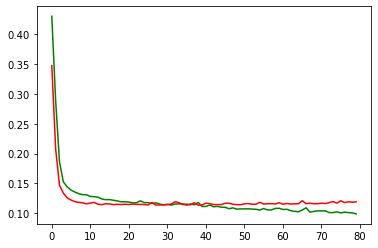

In [106]:
plt.plot(r.history['loss'] , color = 'green')
plt.plot(r.history['val_loss'] , color = 'red')

In [107]:
model.predict(X[N//2].reshape(-1,T,1))[0,0]

0.40773007

In [108]:
pred_vals = []
target_vals = Y[N//2:]

x_last = X[N//2]

while len(pred_vals) < len(target_vals):
    p = model.predict(x_last.reshape(-1,T,1))[0,0]
    pred_vals.append(p)
    x_last = np.roll(x_last , -1)
    x_last[-1] = p

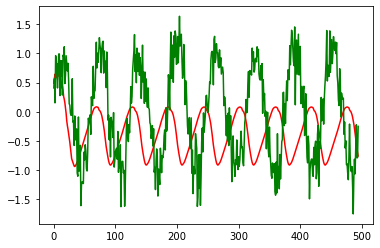

In [109]:
plt.plot(pred_vals , color = 'red')
plt.plot(target_vals , color = 'green')

## result
Not the best model, but something to begin with